In [ ]:
import pandas as pd
data=pd.read_csv('C:\\Users\\Shreya choudhary\\ecsvfile.txt', sep=" ",names=["Catalina_Surveys_ID","ID","RA_(J2000)"," Dec ","V_(mag)","Period_(days)","Amplitude","Number_Obs","Var_Type"])
data1=pd.read_csv('C:\\Users\\Shreya choudhary\\Downloads\\ttt\\ALLVar', sep=",",header=None ,names=["ID","MJD","Mag","Magerr","RA","Dec"])
result = data[['ID','Var_Type']].merge(data1[['ID','MJD','Mag']], on = 'ID',how = 'left')
result1=result.round({'Mag': 6})
result1.to_csv('merged.txt', encoding='utf-8',index=False)


In [ ]:
import os
import time
from sklearn.utils import shuffle

import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import itertools

from lasagne import random as lasagne_random
from lasagne import layers
from lasagne.nonlinearities import softmax, tanh
from lasagne import objectives
from lasagne import updates

import theano
import theano.tensor as T

import warnings
warnings.filterwarnings("ignore")

In [3]:
(result1.loc[result1['Var_Type'] == 13]).to_csv('vartype_13_data.txt',encoding='utf-8',index=False)


In [4]:
import pandas as pd
data2=pd.read_csv('C:\\Users\\Shreya choudhary\\vartype_13_data.txt')
data3 = data2.groupby('ID')
data3.apply(lambda x: x.to_csv('ID' + str(x.name) + '.txt',index=False,header=None))

""


           dm_y        dt_x  ybin  xbin
0     -0.014146    0.006372    11     0
1      0.129824    0.019078    13     2
2     -0.032956   19.036976    11   288
3      0.023941   19.049350    12   288
4      0.033344 -146.669720    12     0
5      0.037582 -146.663754    12     0
6     -0.085886 -146.657779    11     0
7     -0.015352 -146.651788    11     0
8     -0.010269  -34.859334    11     0
9     -0.111367  -34.853453    10     0
10    -0.033444  -34.847613    11     0
11    -0.064046  -34.841720    11     0
12     0.086033   -7.012479    12     0
13     0.172524   -6.992898    13     0
14    -0.168970  -63.749622    10     0
15    -0.131694  -63.743033    10     0
16    -0.243343  -63.736447     9     0
17    -0.168928  -63.729886    10     0
18    -0.564607  -58.792988     7     0
19    -0.052486  -58.786463    11     0
20    -0.179925  -58.779858    10     0
21    -0.191313  -58.773247    10     0
22    -0.099716  -39.834526    11     0
23    -0.285036  -82.818805     9     0


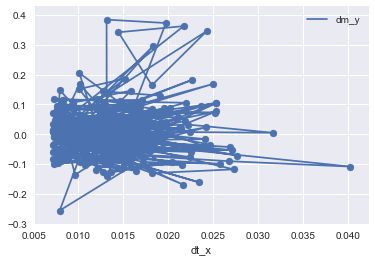

5.708955436901322
4.7574628640844345
3.8059702912675477
0.9514925728168869
61.84701723309765
39.011195485492365
10.466418300985756
58.0410469418301
28.544777184506607
9.514925728168869
0.9514925728168869
10.466418300985756
7.611940582535095
4.7574628640844345
0.9514925728168869
0.9514925728168869
0.9514925728168869
1.9029851456337739
1.9029851456337739
0.9514925728168869


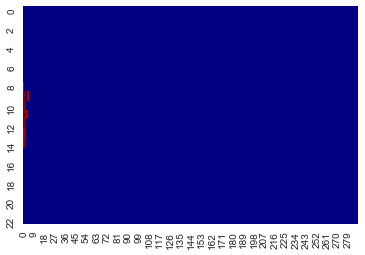

In [14]:
import pandas as pd
import glob
import numpy as np
from matplotlib import pyplot as plt

#l = [pd.read_csv(filename) for filename in glob.glob("C:\\Users\\Shreya choudhary\\variable type\\*.txt")]


#file_list = glob.glob("/home/dic/jupyter/var4_txtfiles" + "/*.txt") #Get folder path containing text files

#print(file_list)
d=1
#for file_path in file_list:
    #print(file_path)
ID,Var_Type,MJD,Mag=np.loadtxt("C:\\Users\\Shreya Choudhary\\var4_txtfiles\\ID1001006032764.txt", unpack=True, delimiter=',')
c=[]
e=[]
for i in range(0,len(Mag)):
    for j in range(i+1,len(Mag)):
        c.append(Mag[i]-Mag[j])
    #print(c)   
for i in range(0,len(MJD)):
    for j in range(i+1,len(MJD)):
        e.append(MJD[j]-MJD[i])
    #print(e)
s1 = pd.Series(c, name='dm_y')

s2 = pd.Series(e,name='dt_x')

#Assigning bins to all dmdt values

bins=[-8,-5,-3,-2.5,-2,-1.5,-1,-0.5,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.5,1,1.5,2,2.5,3,5,8]
#bins1=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900,910,920,930,940,950,960,970,980,990,1000,1010,1020,1030,1040,1050,1060,1070,1080,1090,1100,1110,1120,1130,1140,1150,1160,1170,1180,1190,1200,1210,1220,1230,1240,1250,1260,1270,1280,1290,1300,1310,1320,1330,1340,1350,1360,1370,1380,1390,1400,1410,1420,1430,1440,1450,1460,1470,1480,1490,1500,1510,1520,1530,1540,1550,1560,1570,1580,1590,1600,1610,1620,1630,1640,1650,1660,1670,1680,1690,1700,1710,1720,1730,1740,1750,1760,1770,1780,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100,2110,2120,2130,2140,2150,2160,2170,2180,2190,2200,2210,2220,2230,2240,2250,2260,2270,2280,2290,2300,2310,2320,2330,2340,2350,2360,2370,2380,2390,2400,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500,2510,2520,2530,2540,2550,2560,2570,2580,2590,2600,2610,2620,2630,2640,2650,2660,2670,2680,2690,2700,2710,2720,2730,2740,2750,2760,2770,2780,2790,2800,2810,2820,2830,2840,2850,2860,2870] #bins of x axis
bins1=[1 / 144,2 / 144,3 / 144,4 / 144,5 / 144,6 / 144,7 / 144,8 / 144,9 / 144,10 / 144,11 / 144,12 / 144,13 / 144,14 / 144,15 / 144,16 / 144,17 / 144,18 / 144,19 / 144,20 / 144,21 / 144,22 / 144,23 / 144,24 / 144,25 / 144,26 / 144,27 / 144,28 / 144,29 / 144,30 / 144,31 / 144,32 / 144,33 / 144,34 / 144,35 / 144,36 / 144,37 / 144,38 / 144,39 / 144,40 / 144,41 / 144,42 / 144,43 / 144,44 / 144,45 / 144,46 / 144,47 / 144,48 / 144,49 / 144,50 / 144,51 / 144,52 / 144,53 / 144,54 / 144,55 / 144,56 / 144,57 / 144,58 / 144,59 / 144,60 / 144,61 / 144,62 / 144,63 / 144,64 / 144,65 / 144,66 / 144,67 / 144,68 / 144,69 / 144,70 / 144,71 / 144,72 / 144,73 / 144,74 / 144,75 / 144,76 / 144,77 / 144,78 / 144,79 / 144,80 / 144,81 / 144,82 / 144,83 / 144,84 / 144,85 / 144,86 / 144,87 / 144,88 / 144,89 / 144,90 / 144,91 / 144,92 / 144,93 / 144,94 / 144,95 / 144,96 / 144,97 / 144,98 / 144,99 / 144,100 / 144,101 / 144,102 / 144,103 / 144,104 / 144,105 / 144,106 / 144,107 / 144,108 / 144,109 / 144,110 / 144,111 / 144,112 / 144,113 / 144,114 / 144,115 / 144,116 / 144,117 / 144,118 / 144,119 / 144,120 / 144,121 / 144,122 / 144,123 / 144,124 / 144,125 / 144,126 / 144,127 / 144,128 / 144,129 / 144,130 / 144,131 / 144,132 / 144,133 / 144,134 / 144,135 / 144,136 / 144,137 / 144,138 / 144,139 / 144,140 / 144,141 / 144,142 / 144,143 / 144,144 / 144,145 / 144,146 / 144,147 / 144,148 / 144,149 / 144,150 / 144,151 / 144,152 / 144,153 / 144,154 / 144,155 / 144,156 / 144,157 / 144,158 / 144,159 / 144,160 / 144,161 / 144,162 / 144,163 / 144,164 / 144,165 / 144,166 / 144,167 / 144,168 / 144,169 / 144,170 / 144,171 / 144,172 / 144,173 / 144,174 / 144,175 / 144,176 / 144,177 / 144,178 / 144,179 / 144,180 / 144,181 / 144,182 / 144,183 / 144,184 / 144,185 / 144,186 / 144,187 / 144,188 / 144,189 / 144,190 / 144,191 / 144,192 / 144,193 / 144,194 / 144,195 / 144,196 / 144,197 / 144,198 / 144,199 / 144,200 / 144,201 / 144,202 / 144,203 / 144,204 / 144,205 / 144,206 / 144,207 / 144,208 / 144,209 / 144,210 / 144,211 / 144,212 / 144,213 / 144,214 / 144,215 / 144,216 / 144,217 / 144,218 / 144,219 / 144,220 / 144,221 / 144,222 / 144,223 / 144,224 / 144,225 / 144,226 / 144,227 / 144,228 / 144,229 / 144,230 / 144,231 / 144,232 / 144,233 / 144,234 / 144,235 / 144,236 / 144,237 / 144,238 / 144,239 / 144,240 / 144,241 / 144,242 / 144,243 / 144,244 / 144,245 / 144,246 / 144,247 / 144,248 / 144,249 / 144,250 / 144,251 / 144,252 / 144,253 / 144,254 / 144,255 / 144,256 / 144,257 / 144,258 / 144,259 / 144,260 / 144,261 / 144,262 / 144,263 / 144,264 / 144,265 / 144,266 / 144,267 / 144,268 / 144,269 / 144,270 / 144,271 / 144,272 / 144,273 / 144,274 / 144,275 / 144,276 / 144,277 / 144,278 / 144,279 / 144,280 / 144,281 / 144,282 / 144,283 / 144,284 / 144,285 / 144,286 / 144,287 / 144,288 / 144]
return_bins_of_s2 = np.digitize(s2, bins1) # np.digitize gives the bin number to which a particular value of dm, dt belongs to.
return_bins_of_s1 = np.digitize(s1, bins)
ybins = pd.Series(return_bins_of_s1, name='ybin')
xbins = pd.Series(return_bins_of_s2, name='xbin')

dmdt=pd.concat([s1, s2,ybins,xbins], axis=1)
print(dmdt)


# exclude all the values from dataframe dmdt that are outside the bin boundries i.e. bin number 0, 23 and 24
dmdt=dmdt[dmdt.ybin != 23]
dmdt=dmdt[dmdt.xbin != 0]
dmdt=dmdt[dmdt.ybin != 0]
dmdt=dmdt[dmdt.xbin != 288]
dmdt.to_csv('C:\\Users\\Shreya Choudhary\\dmdt_values.txt',encoding='utf-8',header=True,index=True)
print(dmdt)

dmdt['bins_xaxis']=pd.cut(dmdt['dt_x'],bins1) #pd.cut gives range of bin for all dt_x values 
dmdt['bins_yaxis']=pd.cut(dmdt['dm_y'],bins)

dmdt.plot(x="dt_x", y="dm_y")
plt.scatter(dmdt['dt_x'], dmdt['dm_y'])
plt.show()

dmdt['merged_dmdt']=  dmdt.dm_y.map(str) + ',' + dmdt.dt_x.map(str)
dmdt['dmdt_bin_number']=  dmdt.ybin.map(str) + ',' + dmdt.xbin.map(str)

dmdt.dropna() # drops all the values with NaN in dataframe dmdt
    #print(dmdt)
 

dmdtpairs=len(dmdt.dm_y) # number of dmdtpairs for a light curve of length n that falls under the given bin range
    #print(dmdtpairs)


#grouping and counting all the values that fall in all individual bins
df=dmdt.groupby('dmdt_bin_number',sort=False).merged_dmdt.agg(['count']) #counts how many merged_dmdt benlongs to each 'dmdt_bin_number' range
    #print(df)
df.to_csv('C:\\Users\\Shreya Choudhary\\count155.txt',encoding='utf-8')

data_count=pd.read_csv('C:\\Users\\Shreya Choudhary\\count155.txt')

ldf=dmdt.set_index('dmdt_bin_number').join(data_count.set_index('dmdt_bin_number'))

abcc=ldf.dropna()
final=abcc.drop_duplicates(['ybin','xbin']) # drops all the rows where both of values of ybin and xbin are duplicate
final1=final.drop(['bins_xaxis','bins_yaxis','merged_dmdt'],axis=1)
    #print(final1)
final1.to_csv('C:\\Users\\Shreya Choudhary\\final_table1155.txt',encoding='utf-8',header=None,index=False)

    
dm,dt,xbin,ybin,count=np.loadtxt('C:\\Users\\Shreya Choudhary\\final_table1155.txt',unpack=True,delimiter=',',dtype="i")

# assignig intensity values to each bin. Bins are in the form of 23x24 numpy array

aa = np.zeros(shape=(23,288))
for gg in range(0,len(xbin)):
                    
    l1=xbin[gg]
    m1=ybin[gg]
    o1=count[gg]
    i1=(255 * o1)/(dmdtpairs + 0.99999)
    print(i1)
    aa[l1-1,m1-1]=i1
            
    #print (aa)  
    
import seaborn as sns
sns.set()
image11=sns.heatmap(aa,cmap='jet',vmin=0, vmax=1,cbar=False,xticklabels="auto", yticklabels="auto")

#,square=False,xticklabels=True, yticklabels=True
#image11=sns.heatmap(aa,xticklabels=False, yticklabels=False)
#vmin=0, vmax=255,
#cmap='RdYlBu'// colormap of heatmap
#sns_plot.figure.savefig("output.png")
    #, bbox_inches = 'tight',pad_inches = 0
image11.figure.savefig("C:\\Users\\Shreya Choudhary\\image_var4_dt_resized_bins"+"\\RRab.fig%d.png" %d, bbox_inches = 'tight',pad_inches = 0)
    #d+=1
                    